<a href="https://colab.research.google.com/github/ninja-medved/engen_comp_packages/blob/main/Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import nltk
from nltk.probability import FreqDist
from scipy import interpolate

print('---------------------------Done---------------------------')

---------------------------Done---------------------------


ПУНКТЫ 1-2

In [ ]:
data = pd.read_csv('anime.csv', on_bad_lines='skip', delimiter = ',')
data.head(10)

print('---------------------------Done---------------------------')

---------------------------Done---------------------------


ПУНКТ 3

In [ ]:
print(data.dtypes)

titles = dict()
titles['title'] = 'string'
titles['production'] = 'string'
titles['episodes'] = 'int'
titles['source'] = 'string'
titles['genre'] = 'list'
titles['airdate'] = 'date'
titles['rating'] = 'float'
titles['voters'] = 'int'
titles['theme'] = 'list'
print(titles)
print('---------------------------Done---------------------------')

Title          object
Production     object
Episodes       object
Source         object
Genre          object
Airdate        object
Rating        float64
Voters         object
Theme          object
dtype: object
{'title': 'string', 'production': 'string', 'episodes': 'int', 'source': 'string', 'genre': 'list', 'airdate': 'date', 'rating': 'float', 'voters': 'int', 'theme': 'list'}
---------------------------Done---------------------------


ПУНКТ 4

In [ ]:
data.columns = [x.lower().replace(' ', '_') for x in data.columns]
print(data.columns)

print('---------------------------Done---------------------------')

Index(['title', 'production', 'episodes', 'source', 'genre', 'airdate',
       'rating', 'voters', 'theme'],
      dtype='object')
---------------------------Done---------------------------


In [ ]:
def to_int(x):
  try:
    return int(x)
  except:     
    return np.nan

def normalize_date(date):
    if type(date) == type(" "):
      try:
        return time.strptime(date, '%b %d, %Y, %H:%M (JST)')
      except:
        try:
          return time.strptime(date, '%b %d, %Y')
        except:
          try:
            return time.strptime(date, '%b ??, %Y')
          except:
            try:
              return time.strptime(date, '??? ??, ????')
            except:
              try:
                return time.strptime(date, '??? ??, %Y')  
              except:                  
                return time.strptime(date, '??? ??, %Y')  
    else:
      return time.strptime('1', '%d')
for title in data.columns:
  try:
    if title == 'episodes':
      data['episodes'] = [to_int(x) for x in data['episodes']]
    if titles[title] == 'list':
      data[title] = [x.split(sep = ',') for x in data[title]]
    if title == 'voters':
      data['voters'] = [ int(''.join(y)) for y in [x.split(sep = ',') for x in data['voters']]]
    if title == 'airdate':
      data['airdate'] = [normalize_date(date) for date in data['airdate']]
  except:
    data[title] = data[title]

data.head(5)

,title,production,episodes,source,genre,airdate,rating,voters,theme
0,Shingeki no Kyojin,Wit Studio,25.0,Manga,"[Action, Drama, Fantasy, Mystery]","(2013, 4, 7, 1, 58, 0, 6, 97, -1)",8.52,3142121,"[Military, Super Power]"
1,Fullmetal Alchemist: Brotherhood,Bones,64.0,Manga,"[Action, Adventure, Comedy, Drama, Fantasy]","(2009, 4, 5, 17, 0, 0, 6, 95, -1)",9.16,2676911,[Military]
2,Sword Art Online,A-1 Pictures,25.0,Light novel,"[Action, Adventure, Fantasy, Romance]","(2012, 7, 8, 0, 0, 0, 6, 190, -1)",7.20,2586628,[Game]
3,One Punch Man,Madhouse,12.0,Web manga,"[Action, Comedy, Sci-Fi, Supernatural]","(2015, 10, 5, 1, 5, 0, 0, 278, -1)",8.52,2583068,"[Parody, Super Power]"
4,Boku no Hero Academia,Bones,13.0,Manga,"[Action, Comedy]","(2016, 4, 3, 17, 0, 0, 6, 94, -1)",7.98,2426309,"[School, Super Power]"


ПУНКТ 5

In [ ]:
def func(x):
  if type(x) == type(int()) or type(x) == type(float()): 
    return x
  else:
    return np.inf

print(data.describe(percentiles=[.25, .75, .90]))

          episodes       rating        voters
count  1939.000000  1944.000000  1.992000e+03
mean     14.975245     7.150849  1.643311e+05
std      28.116711     0.709454  3.135926e+05
min       1.000000     2.960000  8.662000e+03
25%       1.000000     6.720000  2.126500e+04
50%      12.000000     7.210000  5.478550e+04
75%      13.000000     7.590000  1.585070e+05
90%      26.000000     8.030000  4.041658e+05
max     500.000000     9.160000  3.142121e+06


ПУНКТ 6

In [ ]:
tmp = dict()
for title in data.columns:
  if titles[title] == 'list':
    print(title, ':')
    tmp[title] = FreqDist(sum([list(i) for i in data[title]], []))
    for fdata in tmp[title].items():
      name, count = fdata
      print('\t', name, '-', count)


genre :
	 Action - 1992
	 Drama - 447
	 Fantasy - 711
	 Mystery - 187
	 Adventure - 620
	 Comedy - 645
	 Romance - 225
	 Sci-Fi - 610
	 Supernatural - 454
	 Horror - 109
	 Suspense - 29
	 Slice of Life - 29
	 Ecchi - 173
	 Avant Garde - 10
	 Sports - 59
	 Gourmet - 5
	 Girls Love - 11
	 Boys Love - 9
	 Work Life - 1
theme :
	 Military - 224
	 Super Power - 311
	 Game - 76
	 Parody - 45
	 School - 185
	 Psychological - 69
	 Martial Arts - 141
	 Demons - 131
	 Historical - 148
	 Mecha - 277
	 Shounen - 179
	 Crunchyroll - 11
	 Funimation - 90
	 Space - 118
	 Police - 63
	 Aniplex of America - 45
	 Sentai Filmworks - 40
	 Vampire - 58
	 Samurai - 73
	 GKIDS - 3
	 Geneon Entertainment USA - 2
	 Seinen - 66
	 Harem - 82
	 Shoujo - 19
	 Ponycan USA - 3
	 Kids - 43
	 VIZ Media - 2
	 - - 134
	 Music - 28
	 Cars - 16
	 Bandai Entertainment - 5
	 Josei - 3
	 Discotek Media - 15
	 ADV Films - 11
	 Media Blasters - 7
	 Tokyopop - 1
	 Shout! Factory - 4
	 Warner Bros. Japan - 1
	 AnimEigo - 1
	 Mai

ПУНКТ 7
Вообще не понимаю, что тут надо сделать. Как можно заполнить пропуски в данных, если мы не знаем, какие данные там были? Мы не сможем ни количество эпизодов, ни дату выхода, ни количество оценок предположить. Единственное, если у аниме нет жанра, то можно вписать туда самый популярный жанр, но это было бы очень странно.

ПУНКТ 8

a)


{'Science SARU': 1, 'TROYCA': 1, 'Pine Jam': 1, 'Maho Film': 1, 'EKACHI EPILKA': 1, 'Studio Colorido': 1, 'Shin-Ei Animation': 1, 'ENGI': 1, 'Namu Animation': 1, "Children's Playground Entertainment": 1, 'XEBEC M2': 1, 'Lapin Track': 1, 'Creators in Pack': 1, 'China Literature Limited': 1, 'Bakken Record': 1, 'Tsuchida Productions': 1, 'Visual Flight': 1, 'A-Real': 1, 'Blade': 1, 'l-a-unch・BOX': 1, 'LandQ studios': 1, 'Minami Machi Bugyousho': 1, 'Shirogumi': 1, 'Studio Animal': 1, 'Kamikaze Douga': 1, 'Fifth Avenue': 1, 'G&G Entertainment': 1, 'Anima&Co.': 1, 'Nakamura Production': 1, 'The Answer Studio': 1, 'Nice Boat Animation': 1, 'View Works': 1, 'Think Corporation': 1, 'L²Studio': 1, 'Yumeta Company': 1, 'Yokohama Animation Lab': 1, 'CyberConnect2': 1, 'Kitty Film Mitaka Studio': 1, 'Studio Kai': 1, 'Tokyo Kids': 1, 'TAKI Corporation': 1, 'Craftar Studios': 1, 'Studio Flag': 1, 'CoMix Wave Films': 1, 'FLAGSHIP LINE': 1, 'Phoenix Entertainment': 1, 'Front Line': 1, 'Picture Magic'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


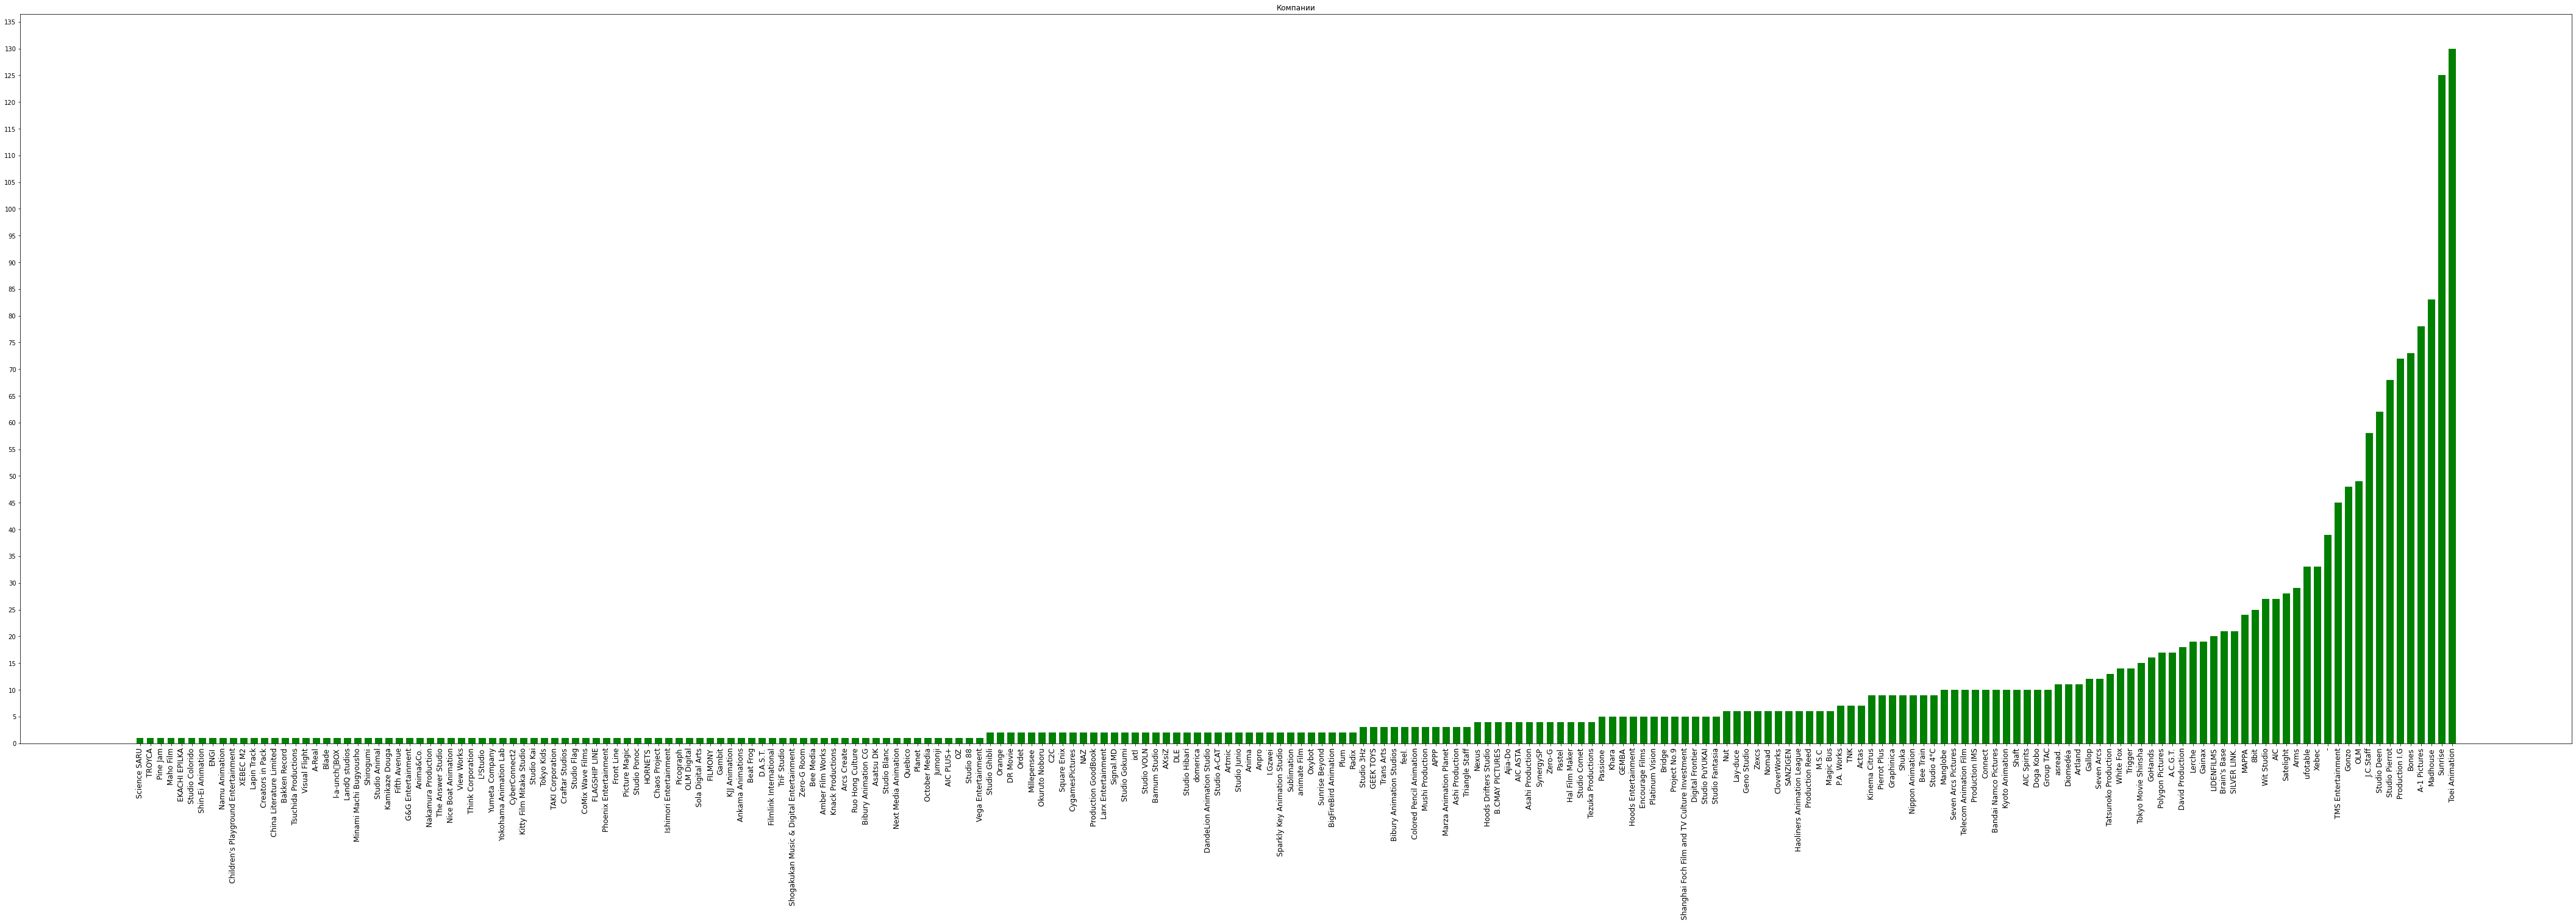

In [ ]:
pro = FreqDist([x for x in data['production']])
dic = dict(pro)
dic = {x[0]: x[1] for x in sorted(dic.items(), key=lambda x: x[1])}
print(dic)

plt.figure(figsize=(75, 22))  
plt.bar(dic.keys(), dic.values(), width=0.7, color='g')      
plt.title("Компании")      
plt.xticks(fontsize=12, rotation=90)   
plt.yticks(ticks=np.arange(0,140,5))  
plt.show()

b)

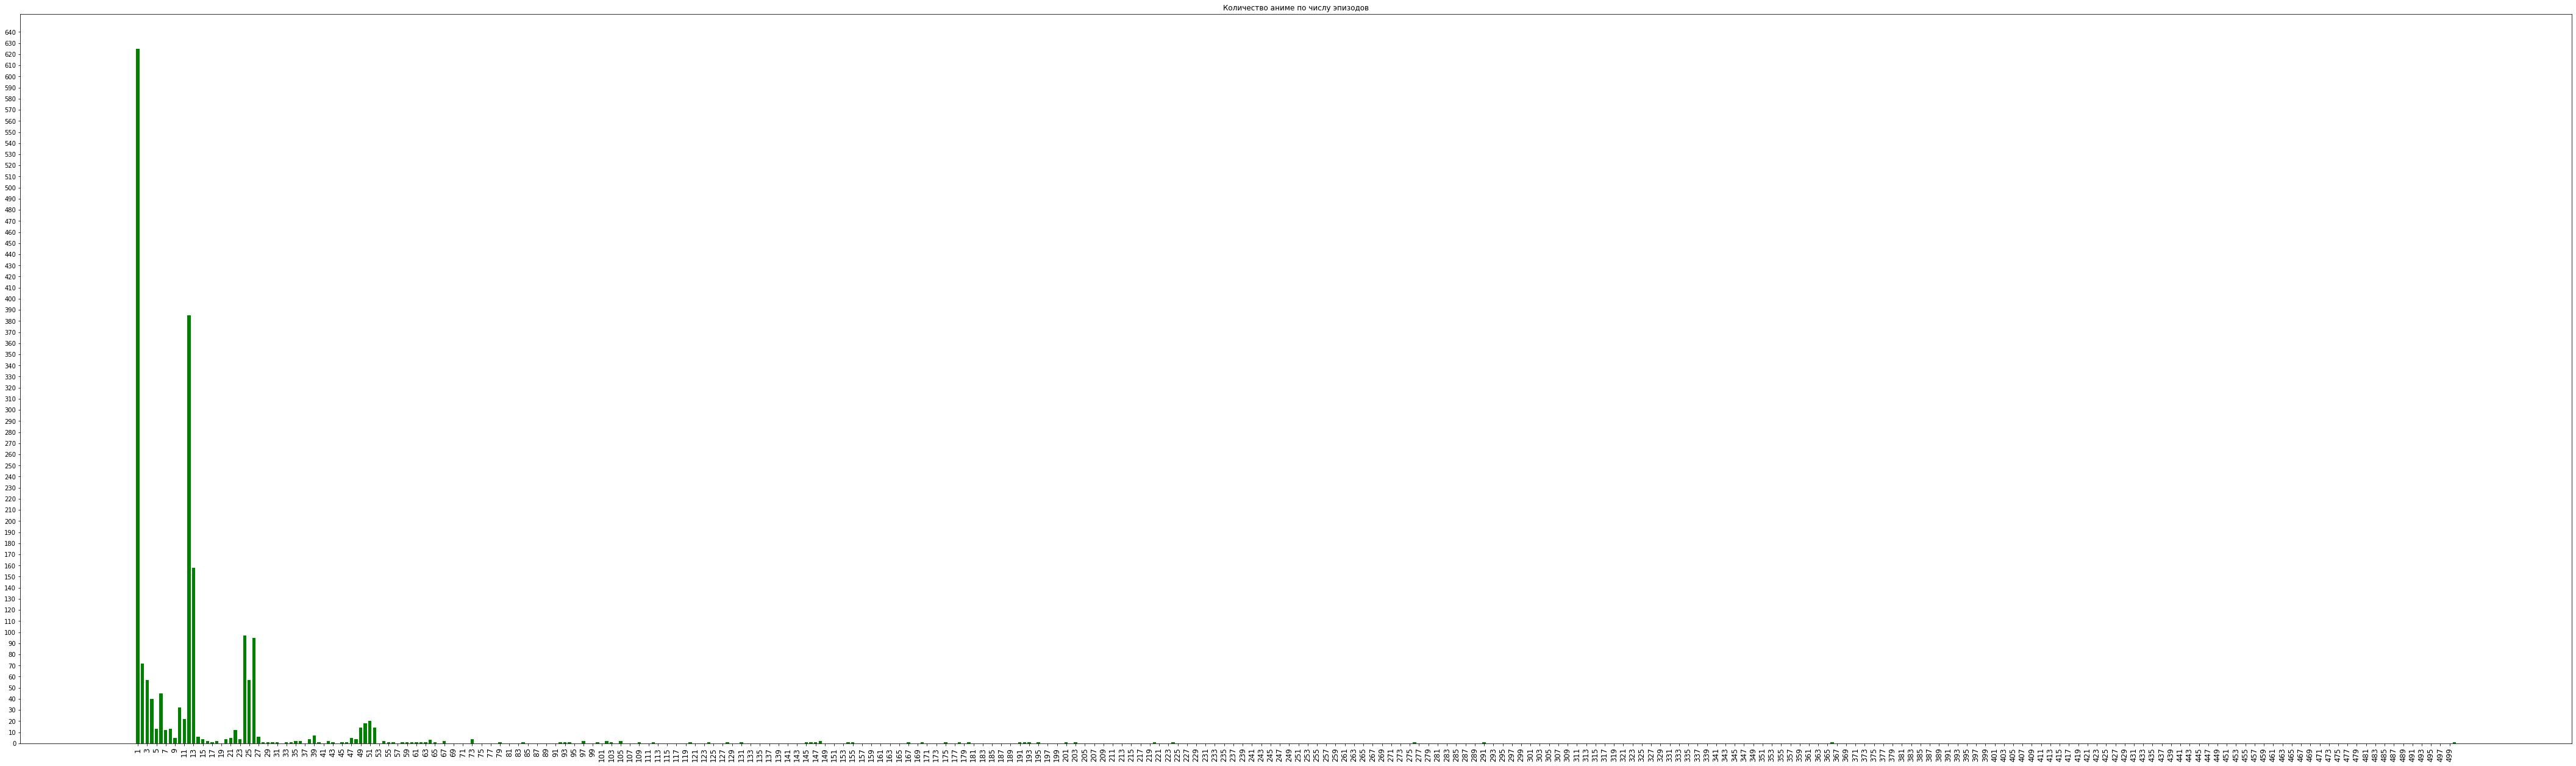

Больше всего аниме с количеством эпизодов: 1 . Их 625 штук.


In [ ]:
ep = FreqDist([x for x in data['episodes']])

dic = dict(ep)
dic = {x[0]: x[1] for x in sorted(dic.items(), key=lambda x: x[0])}

fig = plt.figure(figsize=(75, 22))  
plt.bar(dic.keys(), dic.values(), width=0.7, color='g')      
plt.title("Количество аниме по числу эпизодов")      
plt.xticks(fontsize=12, rotation=90, ticks=np.arange(1,501,2))   
plt.yticks(ticks=np.arange(0,650,10))  
plt.show()

epis, count = ep.most_common(1)[0]
print('Больше всего аниме с количеством эпизодов:', int(epis), '. Их', count, 'штук.')

c)

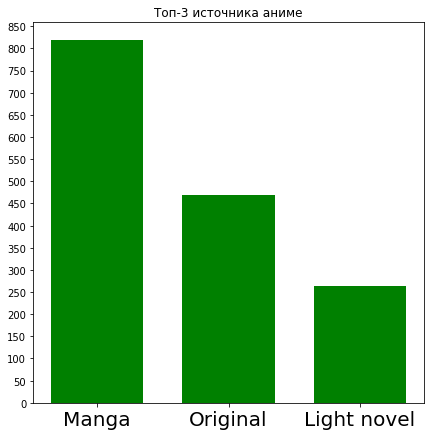

Самый популярный источник аниме - Manga


In [ ]:
so = FreqDist([x for x in data['source']])

dic = dict(so.most_common(3))
dic = {x[0]: x[1] for x in sorted(dic.items(), key=lambda x: x[1], reverse = True)}

fig = plt.figure(figsize=(7, 7))  
plt.bar(dic.keys(), dic.values(), width=0.7, color='g')      
plt.title("Топ-3 источника аниме")      
plt.xticks(fontsize=20)   
plt.yticks(ticks=np.arange(0, 855, 50))  
plt.show()

source, count = so.most_common(1)[0]
print('Самый популярный источник аниме -', source)

d)

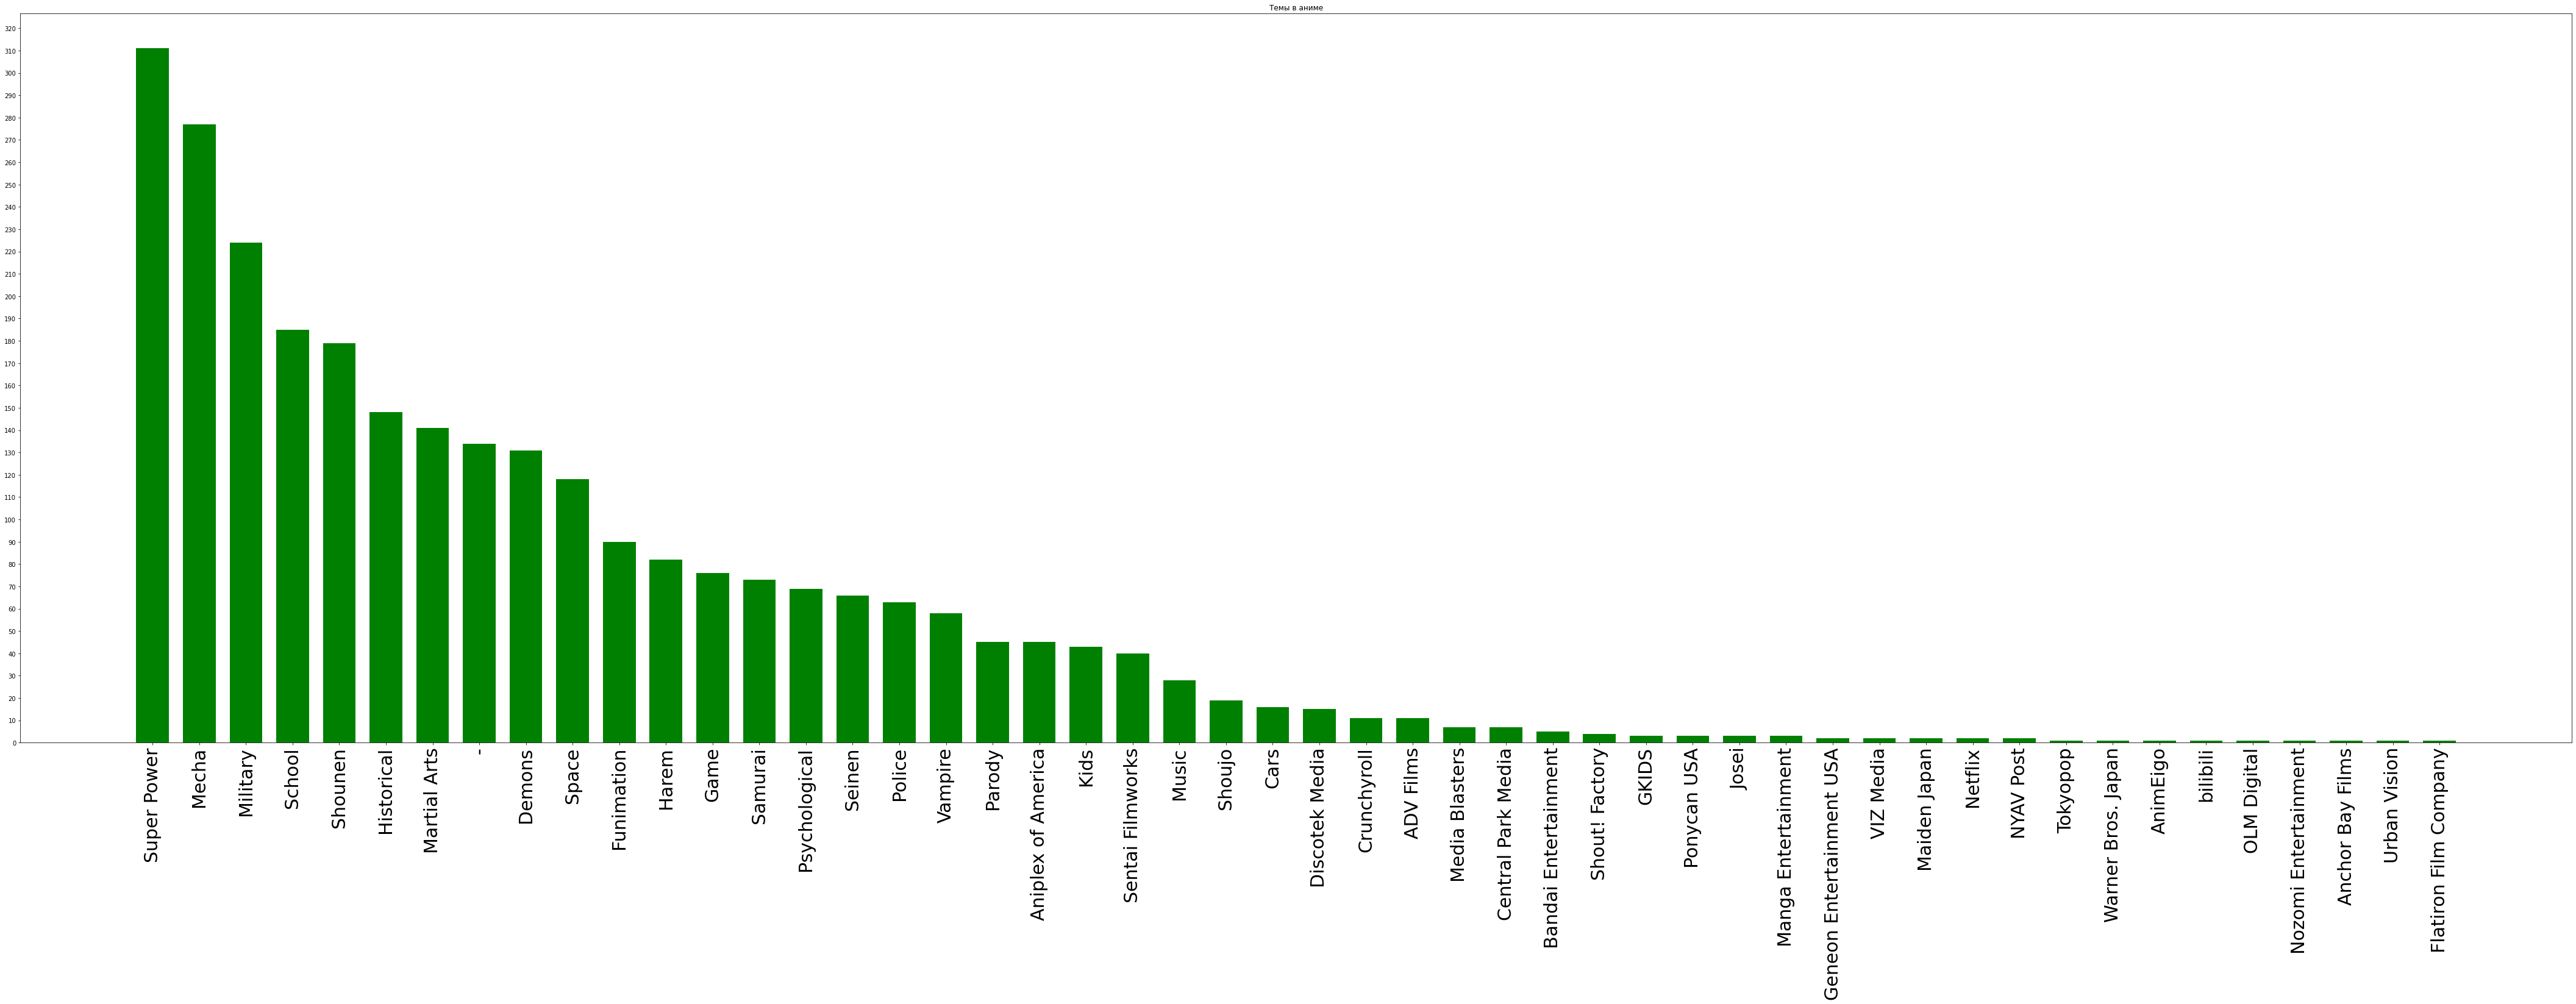

Самая популярная тема в аниме - Super Power


In [ ]:
tmp['theme'] = {x[0]: x[1] for x in sorted(tmp['theme'].items(), key=lambda x: x[1], reverse = True)}
fig = plt.figure(figsize=(75, 22))  
plt.bar(tmp['theme'].keys(), tmp['theme'].values(), width=0.7, color='g')      
plt.title("Темы в аниме")      
plt.xticks(fontsize=30, rotation=90)   
plt.yticks(ticks=np.arange(0, 326, 10))  
plt.show()

for t in tmp['theme'].keys():
  theme = t
  break
print('Самая популярная тема в аниме -', theme)

e)

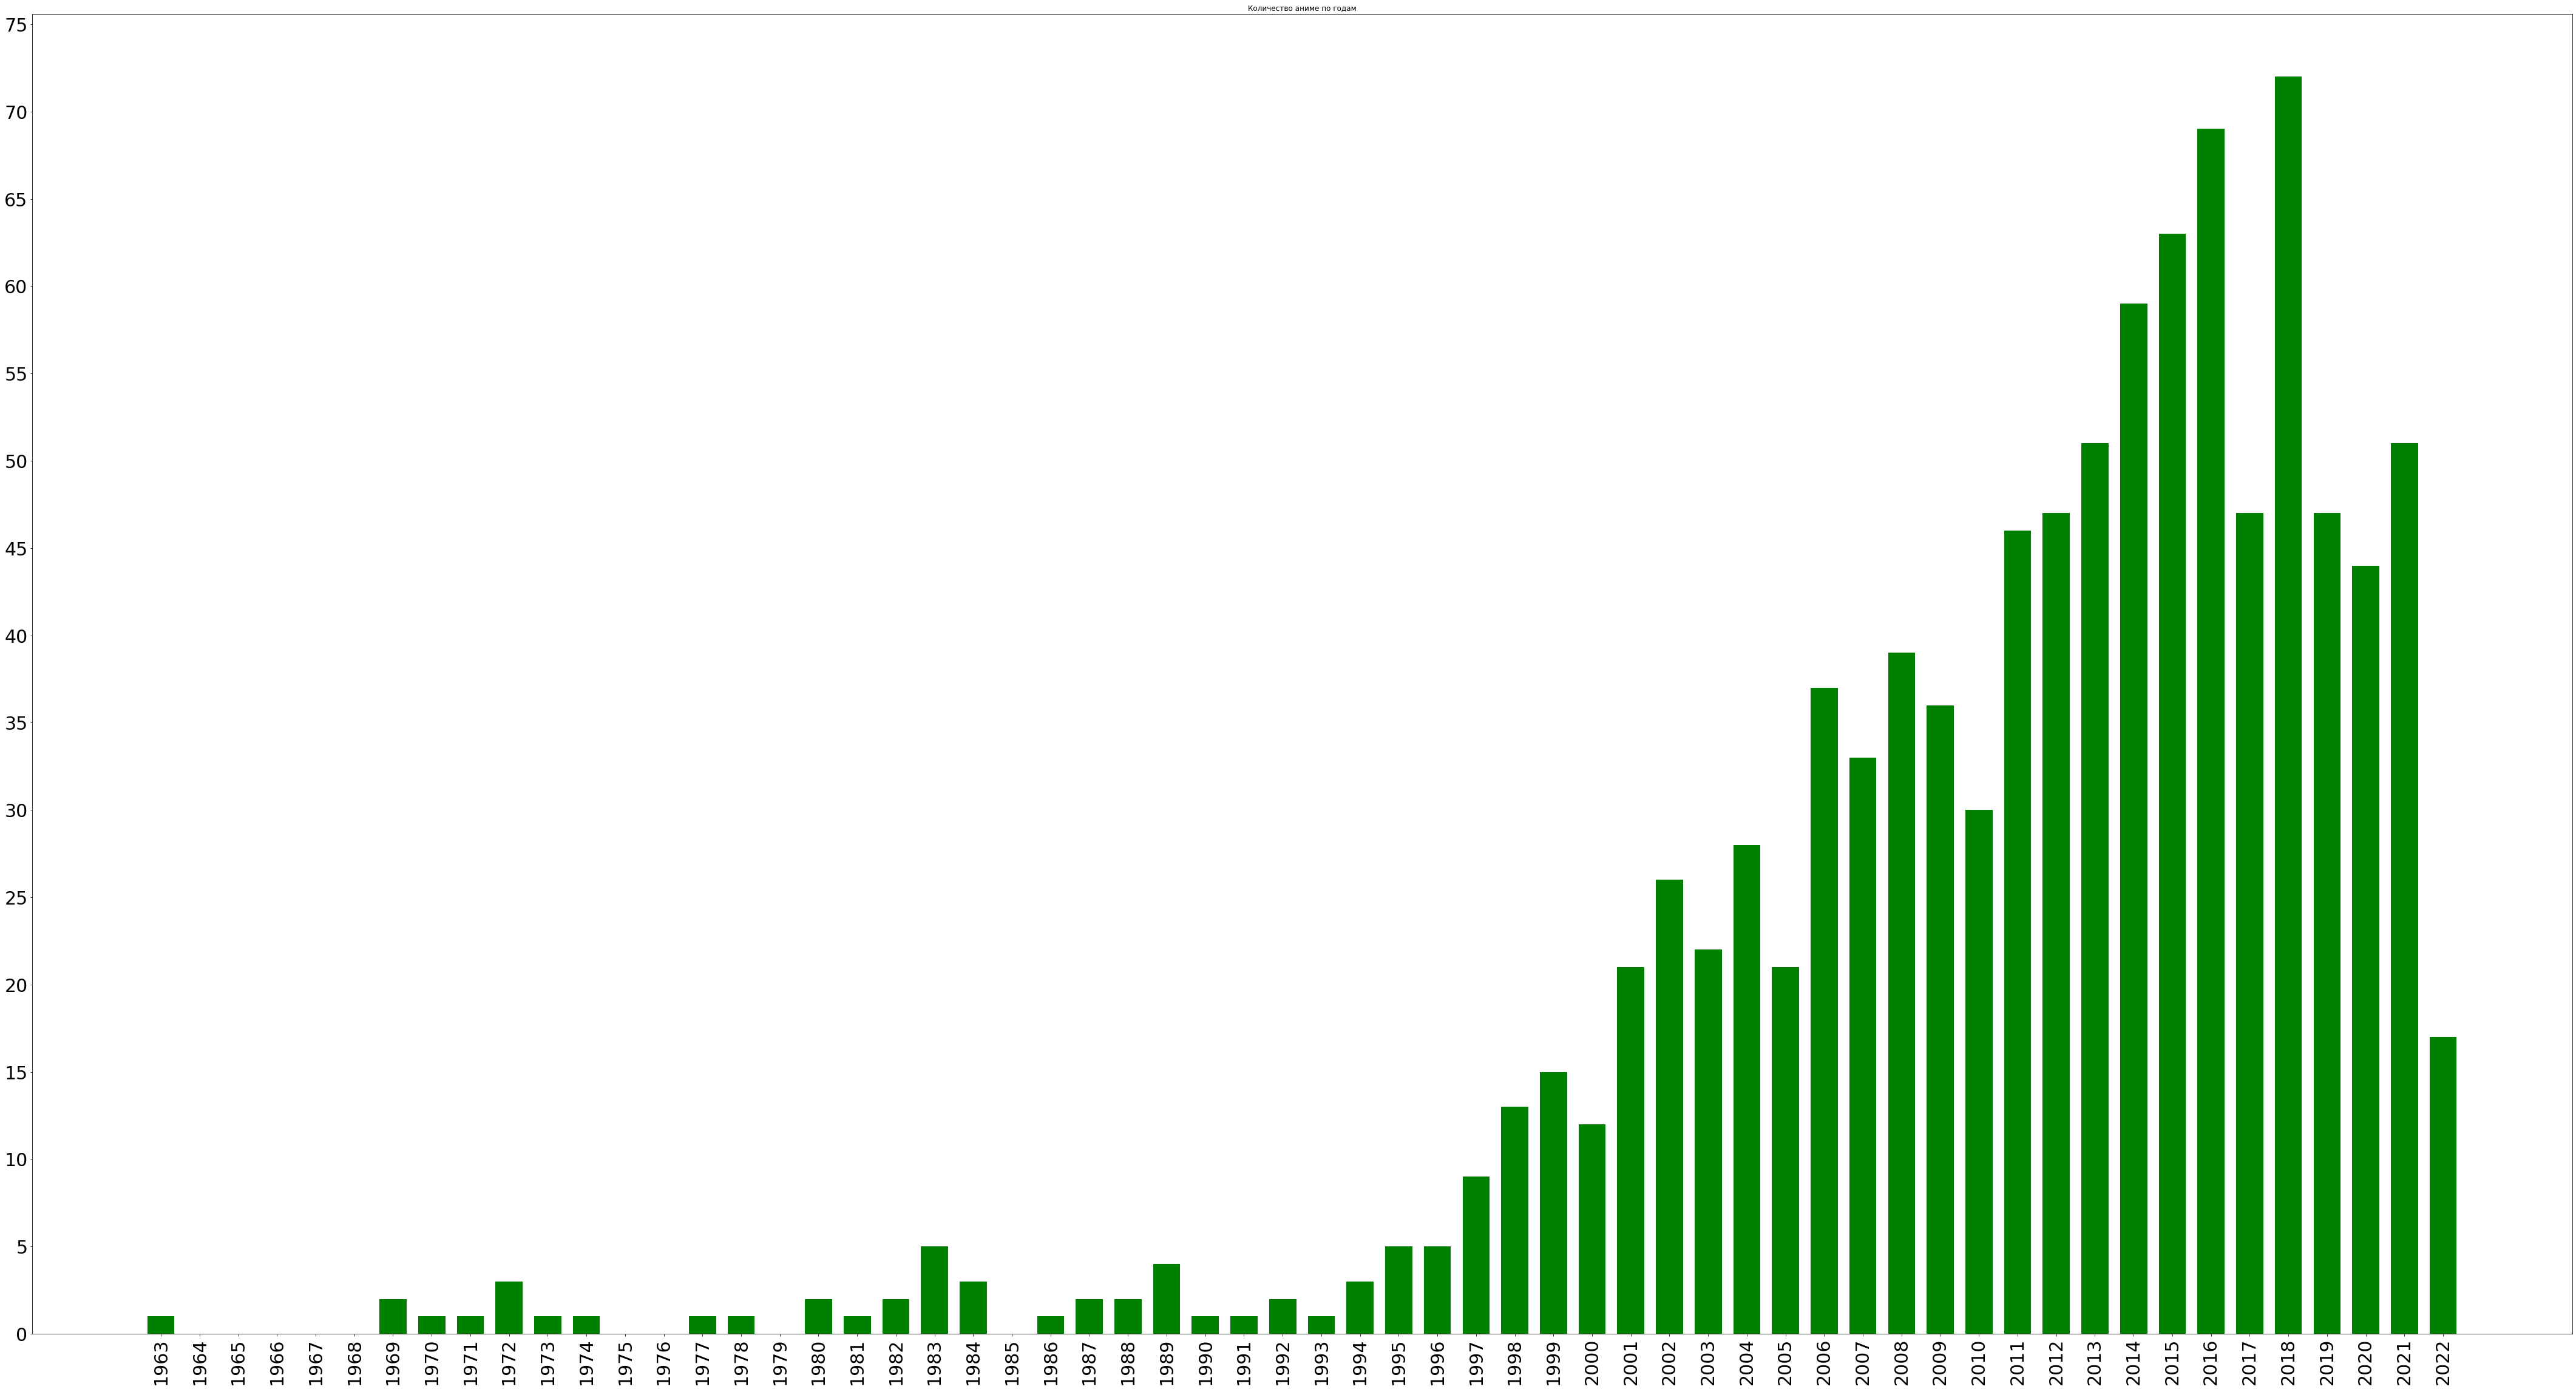

Больше всего аниме вышло в 2018 году.


In [ ]:
# print(data['airdate'])
ti = FreqDist([x[0] for x in data['airdate']]) 
ti.pop(1900)
fig = plt.figure(figsize=(75, 40))  
plt.bar(ti.keys(), ti.values(), width=0.7, color='g')      
plt.title("Количество аниме по годам")      
plt.xticks(fontsize=30, rotation=90, ticks=np.arange(1963, 2023, 1))   
plt.yticks(fontsize=30, ticks=np.arange(0, 80, 5))  
plt.show()

year, count = ti.most_common(1)[0]
print('Больше всего аниме вышло в', year, 'году.')

ПУНКТ 9

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


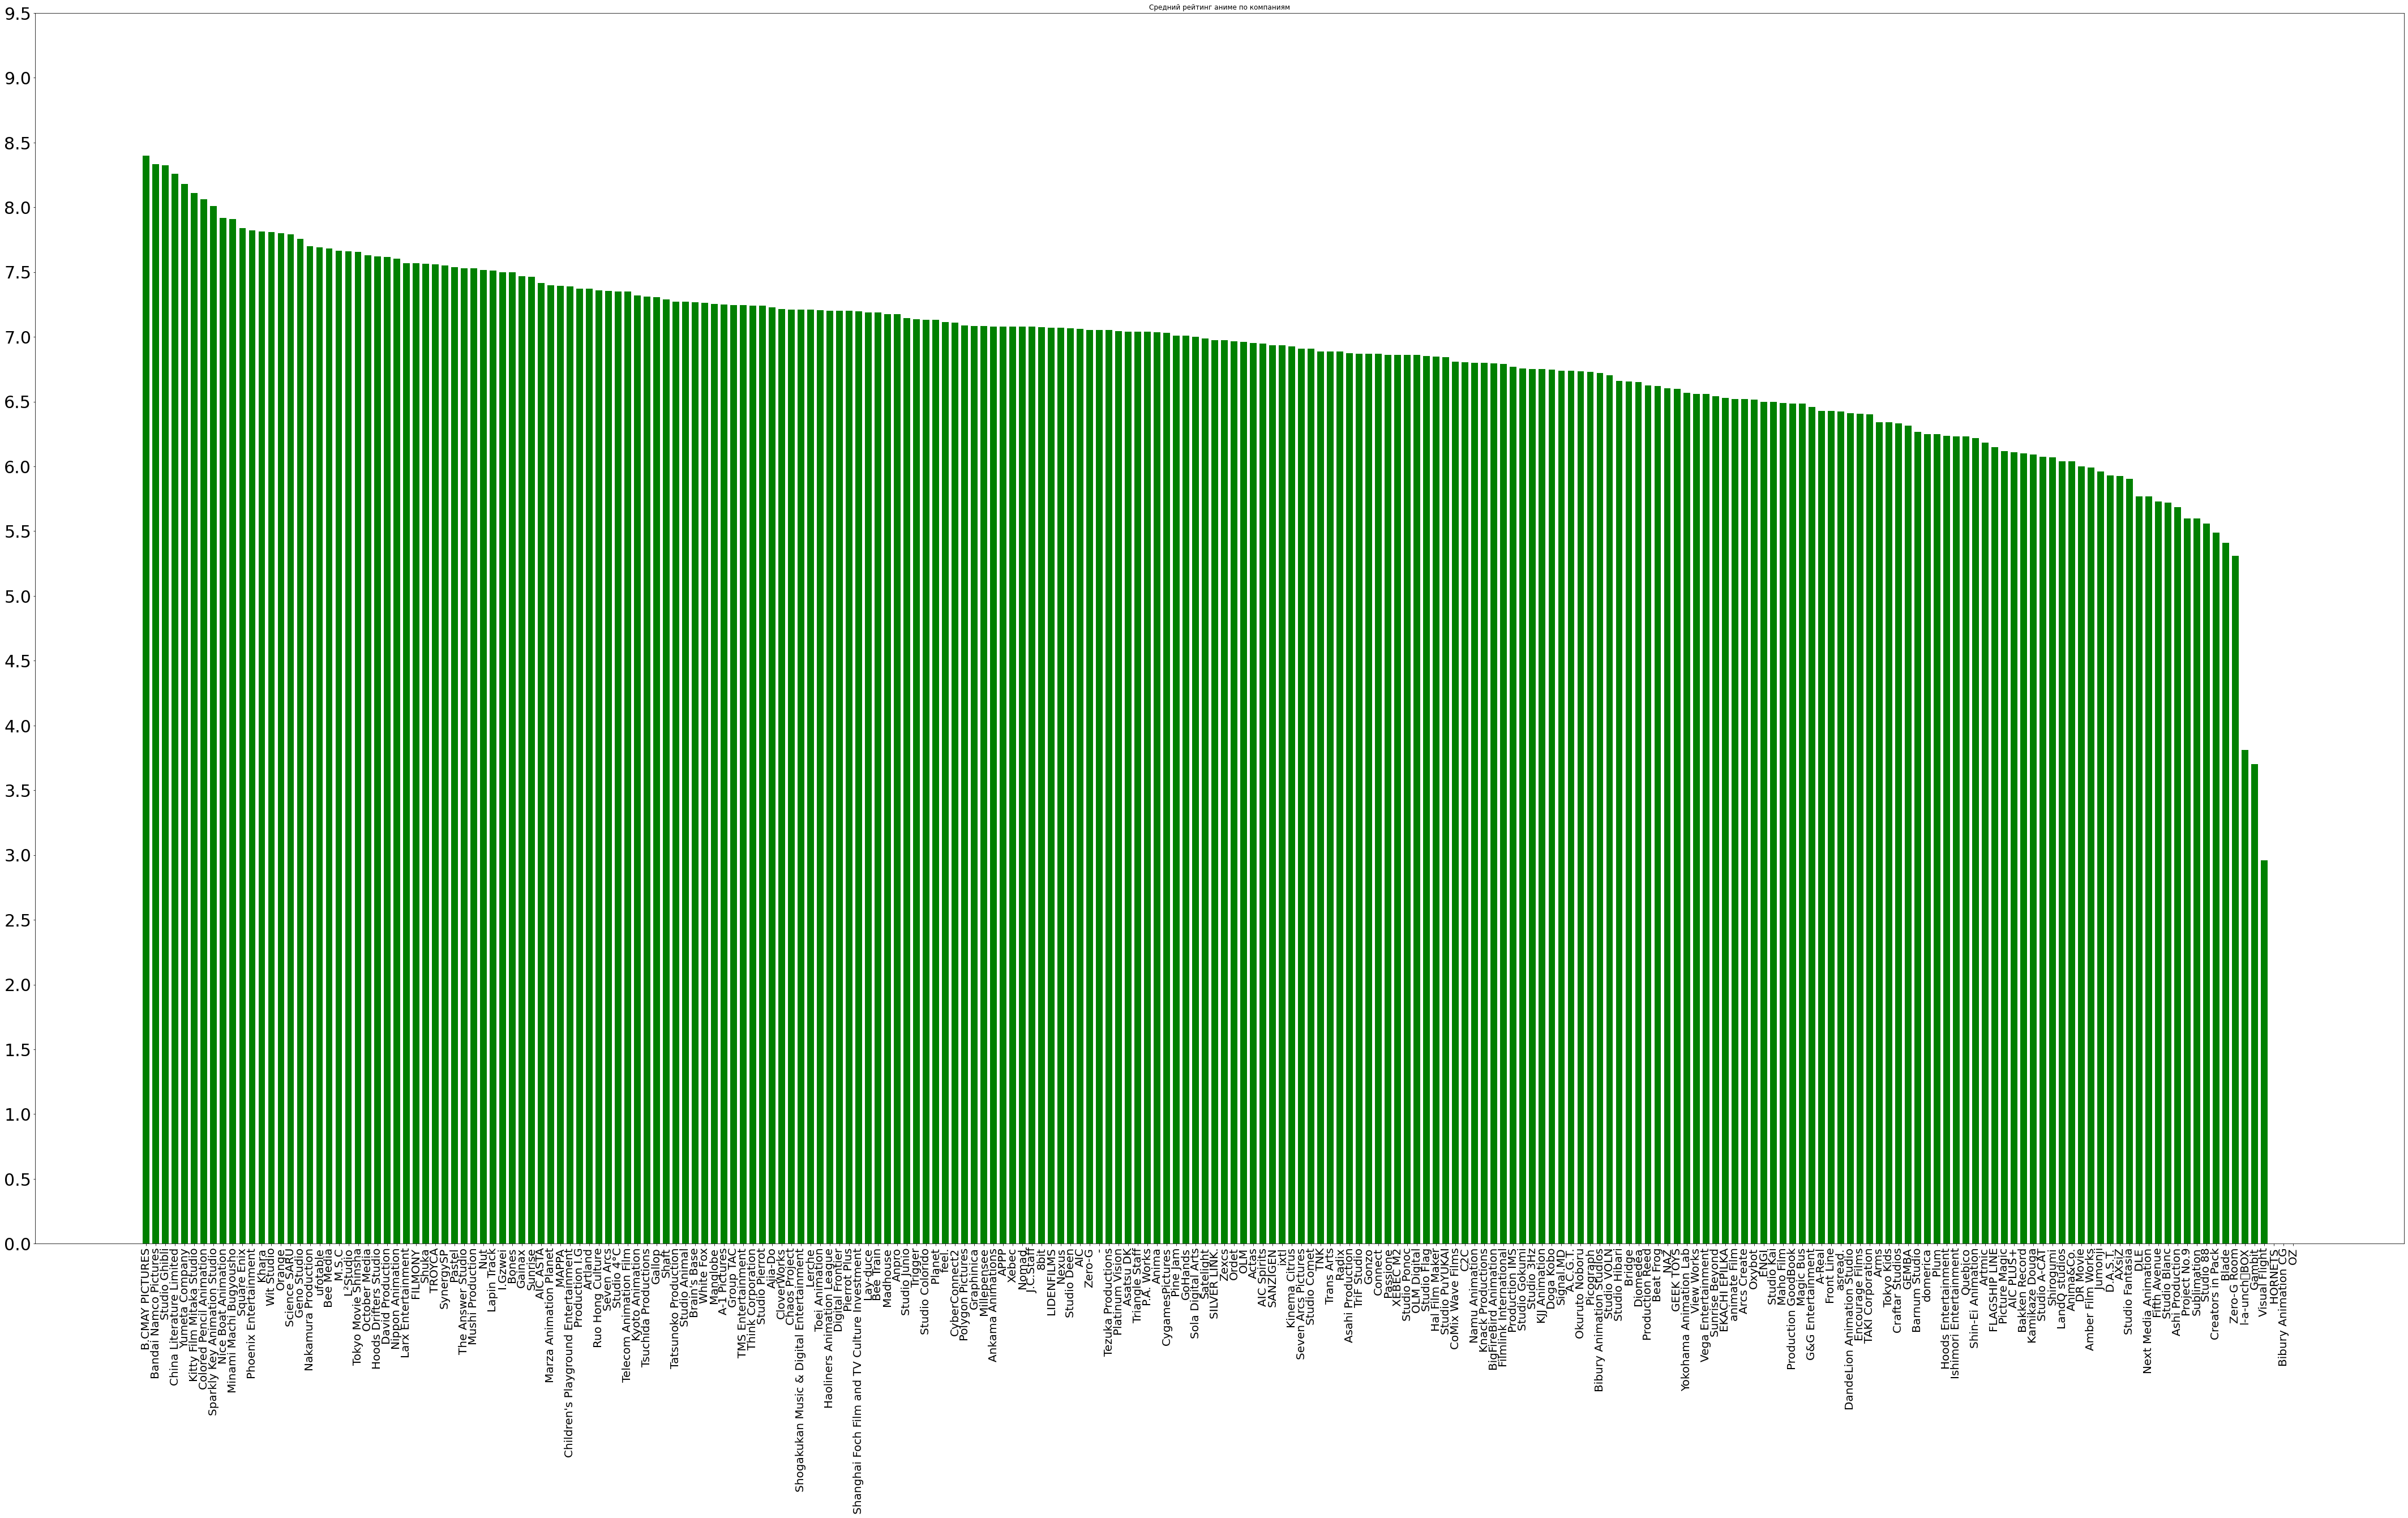

Самые популярные аниме у следующих компаний: B.CMAY PICTURES, Bandai Namco Pictures, Studio Ghibli


In [ ]:
import math

production_rating_dict = {x: list() for x in pro.keys()}

for i in range(0, len(data.index)):
  #data.loc[i].fillna(0)
  series = data.loc[i]
  #series
  if (not math.isnan(series['rating'])):
    production_rating_dict[series['production']].append(series['rating'])



for i in production_rating_dict:
  if len(production_rating_dict[i]):
    production_rating_dict[i] = np.mean(production_rating_dict[i])
  else:
    production_rating_dict[i] = 0

production_rating_dict = {x[0]: x[1] for x in sorted(production_rating_dict.items(), key=lambda x: x[1], reverse = True)}

fig = plt.figure(figsize=(75, 40))  
plt.bar(production_rating_dict.keys(), production_rating_dict.values(), width=0.7, color='g')      
plt.title("Средний рейтинг аниме по компаниям")      
plt.xticks(fontsize=20, rotation=90)   
plt.yticks(fontsize=30, ticks=np.arange(0, 10, .5))  
plt.show()

print('Самые популярные аниме у следующих компаний:', ', '.join([x[0] for x in FreqDist(production_rating_dict).most_common(3)]))

ПУНКТ 10

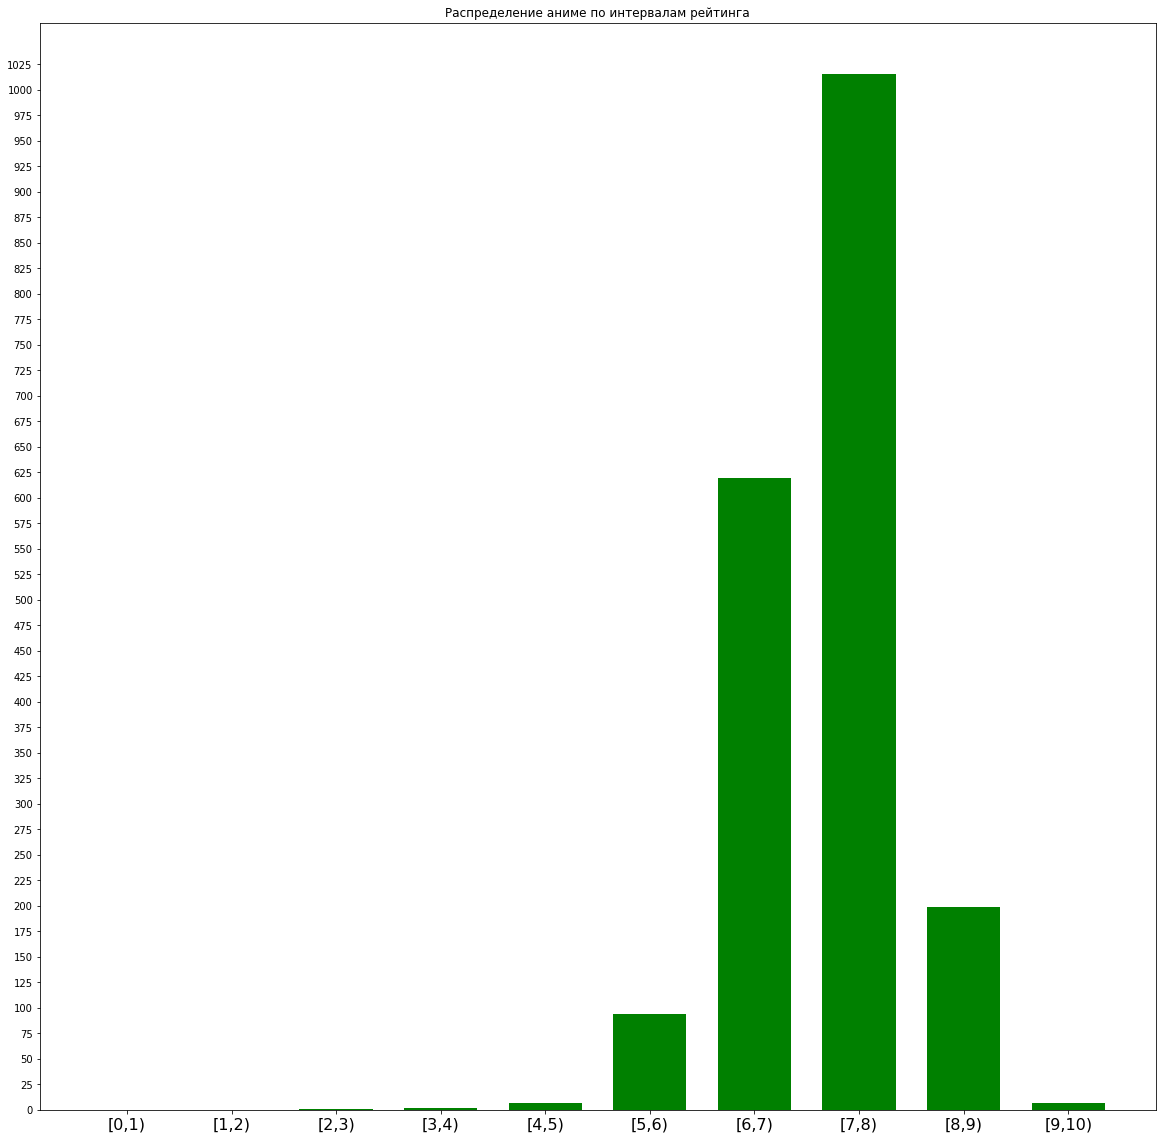

Самые большой интервал рейтинга аниме: [ 7 , 8 )


In [ ]:
anime_rating_dict = {x : 0 for x in range(0, 10, 1)}

for i in range(0, len(data.index)):
  #data.loc[i].fillna(0)
  series = data.loc[i]
  if (not math.isnan(series['rating'])):
    anime_rating_dict[math.floor(series['rating'])] += 1

ticks4x = ['[0,1)','[1,2)','[2,3)','[3,4)','[4,5)','[5,6)','[6,7)','[7,8)','[8,9)','[9,10)']
fig = plt.figure(figsize=(20, 20))  
plt.bar(ticks4x, anime_rating_dict.values(), width=0.7, color='g')      
plt.title("Распределение аниме по интервалам рейтинга")      
plt.xticks(fontsize=16)   
plt.yticks(fontsize=10, ticks=np.arange(0, 1050, 25))  
plt.show()

common = FreqDist(anime_rating_dict).most_common(1)[0][0]
print('Самые большой интервал рейтинга аниме: [', common, ',', common + 1, ')')

ПУНКТ 11

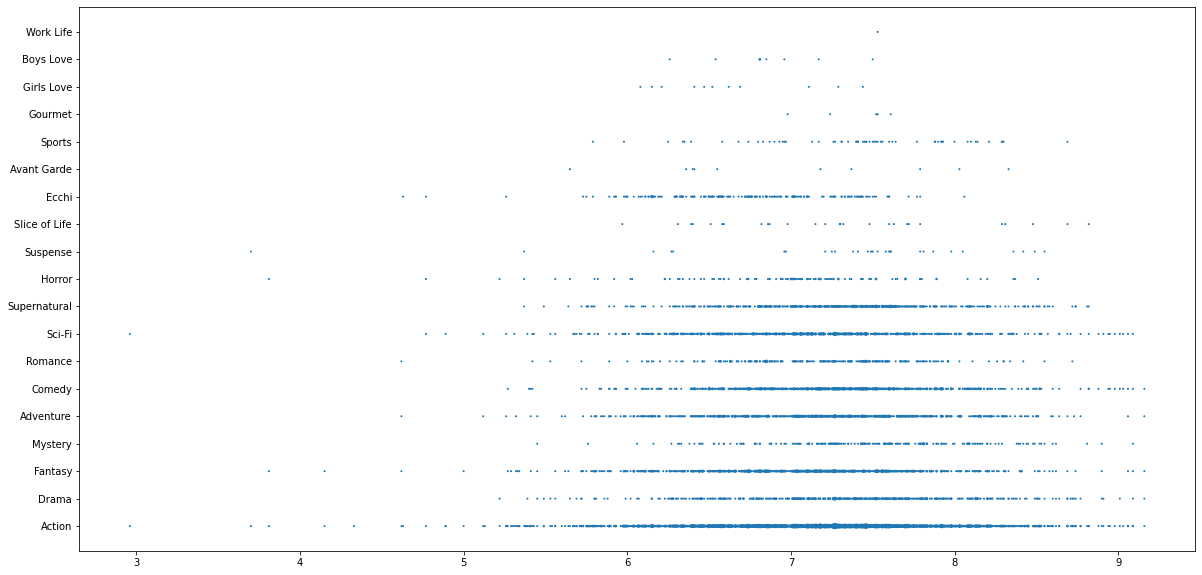

In [ ]:
dataf = pd.DataFrame(columns=['genre', 'rating', 'count'])

genre_dict = {x: list() for x in tmp['genre']}

for i in range(0, len(data.index)):
  series = data.loc[i]
  for x in series['genre']:
    genre_dict[x].append(series['rating'])

for x in genre_dict:
  genre_dict[x] = FreqDist(genre_dict[x])

for tmpgenre, tmpfreq in genre_dict.items():
  for tmprating, tmpcount in tmpfreq.items():
    new_row = {"genre": tmpgenre, "rating": tmprating, "count": float(tmpcount)}
    dataf = dataf.append(new_row, ignore_index=True)

fig = plt.figure(figsize=(20,10))
plt.scatter(x=dataf["rating"], 
            y=dataf["genre"],
            s=dataf["count"])
plt.show()

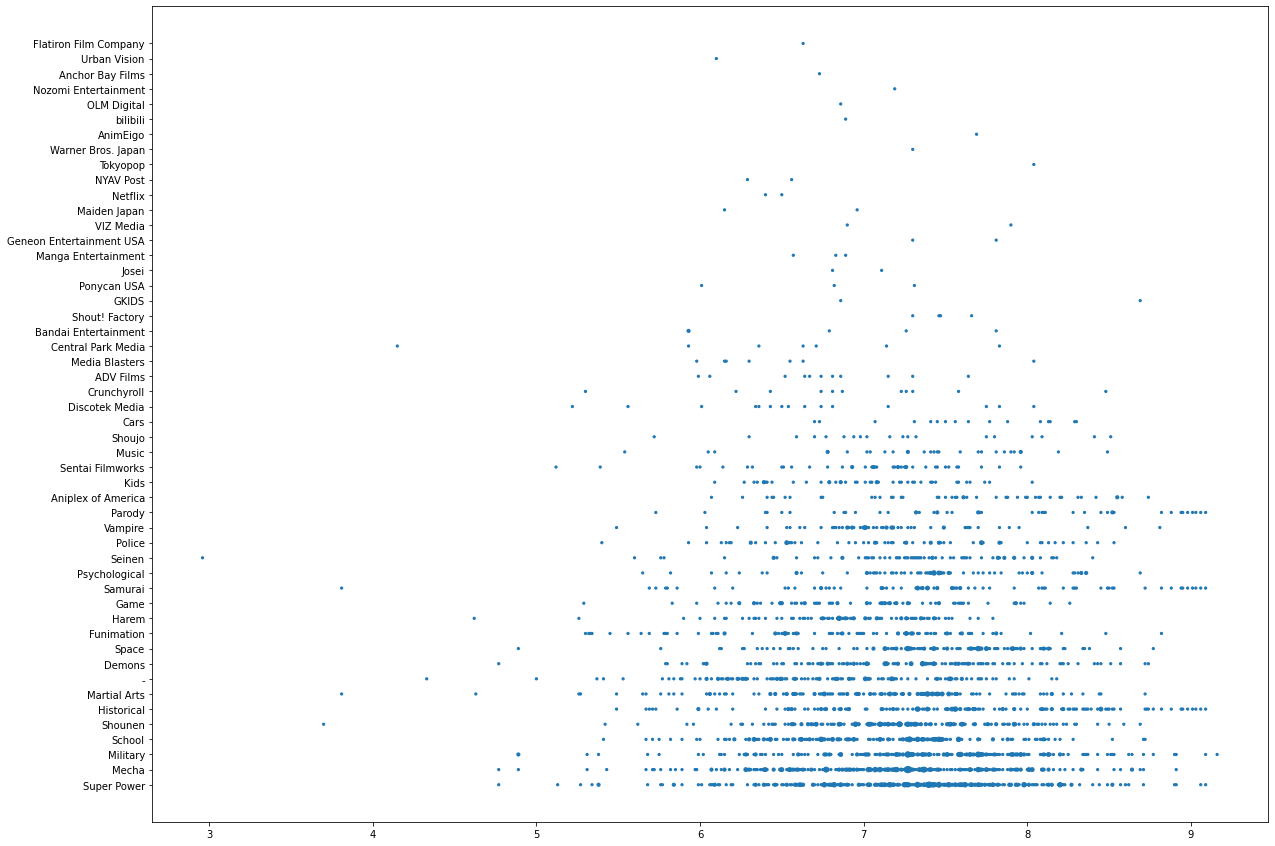

In [ ]:
dataf = pd.DataFrame(columns=['theme', 'rating', 'count'])

theme_dict = {x: list() for x in tmp['theme']}

for i in range(0, len(data.index)):
  series = data.loc[i]
  for x in series['theme']:
    theme_dict[x].append(series['rating'])

for x in theme_dict:
  theme_dict[x] = FreqDist(theme_dict[x])

for tmptheme, tmpfreq in theme_dict.items():
  for tmprating, tmpcount in tmpfreq.items():
    new_row = {"theme": tmptheme, "rating": tmprating, "count": float(tmpcount)}
    dataf = dataf.append(new_row, ignore_index=True)

fig = plt.figure(figsize=(20,15))
plt.scatter(x=dataf["rating"], 
            y=dataf["theme"],
            s=dataf["count"]*5)
plt.show()

ПУНКТ 12

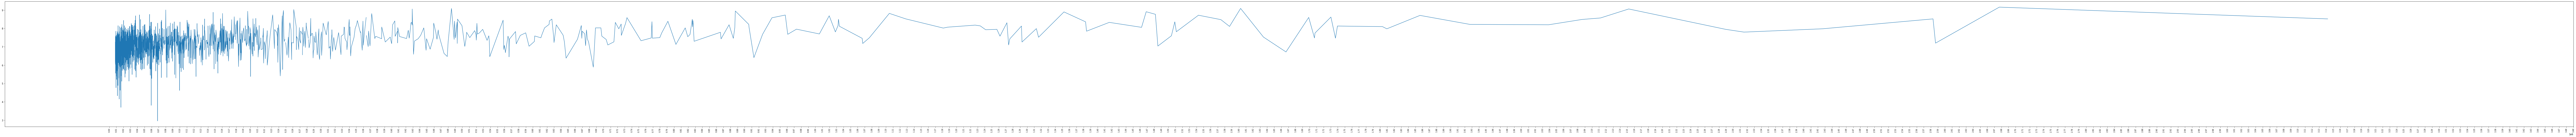

In [ ]:
from scipy.interpolate import splrep, splev
dataf = pd.DataFrame(columns=['voters', 'rating'])

voter_dict = {x: list() for x in data['voters']}

for i in range(0, len(data.index)):
  series = data.loc[i]
  x = series['voters']
  voter_dict[x].append(series['rating'])

for x in voter_dict:
  voter_dict[x] = np.mean(voter_dict[x])

for tmpvoter, tmprating in voter_dict.items():
  new_row = {"voters": float(tmpvoter), "rating": float(tmprating)}
  dataf = dataf.append(new_row, ignore_index=True)

fig = plt.figure(figsize=(200,10))
plt.plot( dataf["voters"], dataf["rating"])
plt.xticks(fontsize=8, rotation=90, ticks=np.arange(0, 3500000, 10000))
plt.show()

1) Чем больше людей проголосовало за аниме, тем оно лучше.
Процент людей, которые ставят оценки фильмам, сериалам, мультикам, всегда остаётся проктически неизменным. Поэтому если оценку аниме поставило много людей, то и посмотрело это аниме куда больше людей. Это могло получится так как если кому-то что-то нравится, он начинает об этом рассказывать своим друзьям и знакомым. Так они узнают об этой вещи и скорее всего тоже захотят попробовать её.
2) Но это не значит, что если голосов мало, то аниме плохое. При малом количестве оценок наверняка сказать ничего нельзя, так как возможно просто данное аниме ещё не стало популярным.